In [2]:
import pandas as pd

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins



# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

### Topics to be analysed

1. Sales conversion with respect to Trainers
2. Sales conversion with respect to Time slot
3. Sales conversion with respect to Topic
4. Sales conversion with respect to Source (Field available in Interested Users)
5. Sales conversion wrt grade
6. Time taken for Sales conversion
7. Time slot – attendance %


In [50]:
IU = pd.read_excel(r"C:\Users\PRITAM\Downloads\assignment_data (1).xlsx",parse_dates=True, sheet_name='Interested Users')
BU = pd.read_excel(r"C:\Users\PRITAM\Downloads\assignment_data (1).xlsx",parse_dates=True, sheet_name="Booked Users")
TR = pd.read_excel(r"C:\Users\PRITAM\Downloads\assignment_data (1).xlsx",parse_dates=True, sheet_name="Trainers")
SB = pd.read_excel(r"C:\Users\PRITAM\Downloads\assignment_data (1).xlsx",parse_dates=True, sheet_name="Subscription Bought")

In [5]:
IU.tail()

,Child name,phone,email_id,school,grade,batch_preferred,source,Submitted At
1678,CH_31436,911100222440,s2m_test_21454@tests2m.com,St Paul's School,Grade 2,"Morning Batch (11:45 - 12:30 PM), Evening Batc...",marchhiusms,2020-04-27 16:22:16
1679,CH_31437,911100222441,s2m_test_21455@tests2m.com,Kps,Grade 2,"Evening Batch (6:00 - 6:45 PM), Morning Batch ...",marchhiusms,2020-04-27 16:39:31
1680,CH_30784,911100222442,s2m_test_21456@tests2m.com,Saint Paul's school,Grade 3,"Morning Batch (11:45 - 12:30 PM), Evening Batc...",marchhiusms,2020-04-27 17:26:57
1681,CH_31438,911100222443,s2m_test_21457@tests2m.com,PS Senior Secondary School,Grade 4,"Morning Batch (11:45 - 12:30 PM), Evening Batc...",marchhiusms,2020-04-27 17:35:25
1682,CH_31439,911100222444,s2m_test_21458@tests2m.com,Delhi Public School panvel,Grade 2,"Evening Batch (6:00 - 6:45 PM), Morning Batch ...",b3rmsms,2020-04-27 18:33:02


In [85]:
IU['source']=IU['source'].astype(str)

<Figure size 432x288 with 0 Axes>

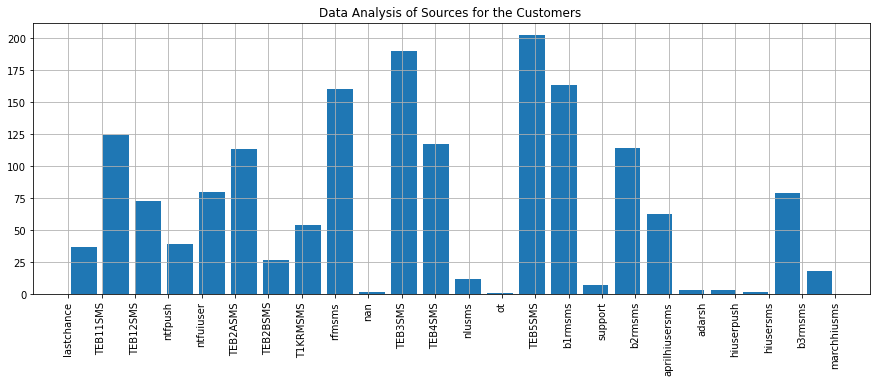

In [101]:
fig = plt.figure();
fig= plt.figure(figsize=(15,5))
plt.hist(IU.source,bins=24, rwidth=.8)
plt.title('Data Analysis of Sources for the Customers ')
plt.xticks(rotation=90)
plt.grid()


The TEB55MS is the highest valued source for the customers with value count 200+

## Analysis of Attendance 

In [157]:
BU.tail()

,Invitee UUID,Batch,Enrolment Type,Child Name,Grade,School,Phone,Parent Email,Opted Start Time,Opted Start Date,Facilitator UUID,Attendance
1706,BBJSY3OJTAA54LMV,"fREADom Trial - Grades 1,2 [III] 06:00pm - Mon...",Trial,CH_31382,Grade 1,Delhi public school north bangalore,911100222386,s2m_test_21399@tests2m.com,27-04-2020 18:00:00,"06:00pm - Monday, April 27, 2020",EBFFJCZNGZSMS7XU,NO Response
1707,FHMX5ZJKVGJOUQTF,"fREADom Trial - Grades 1,2 [III] 06:00pm - Mon...",Trial,CH_31347,Grade 1,Nan group of school,911100222348,s2m_test_21360@tests2m.com,27-04-2020 18:00:00,"06:00pm - Monday, April 27, 2020",EBFFJCZNGZSMS7XU,NO Response
1708,DHMW43JNVC5SDZ6D,"fREADom Trial - Grades 1,2 [III] 06:00pm - Mon...",Trial,CH_31346,Grade 2,Sri kumarans child home,911100222347,s2m_test_21359@tests2m.com,27-04-2020 18:00:00,"06:00pm - Monday, April 27, 2020",EBFFJCZNGZSMS7XU,NO Response
1709,ACIW47ILSKFJ2WPS,"fREADom Trial - Grades 1,2 [III] 06:00pm - Mon...",Trial,CH_31315,Grade 2,Calarox public school,911100222312,s2m_test_21325@tests2m.com,27-04-2020 18:00:00,"06:00pm - Monday, April 27, 2020",EBFFJCZNGZSMS7XU,NO Response
1710,GANT23JJWJNWRGUH,"fREADom Trial - Grades 1,2 [III] 06:00pm - Mon...",Duplicate - Trial,CH_31402,Grade 1,SSRVM,911100222408,s2m_test_21422@tests2m.com,27-04-2020 18:00:00,"06:00pm - Monday, April 27, 2020",EBFFJCZNGZSMS7XU,NO Response


In [155]:
BU['Attendance'].fillna('NO Response', inplace = True) #replacing null values with no response

In [156]:
BU.dtypes

Invitee UUID        object
Batch               object
Enrolment Type      object
Child Name          object
Grade               object
 School             object
Phone                int64
Parent Email        object
Opted Start Time    object
Opted Start Date    object
Facilitator UUID    object
Attendance          object
dtype: object

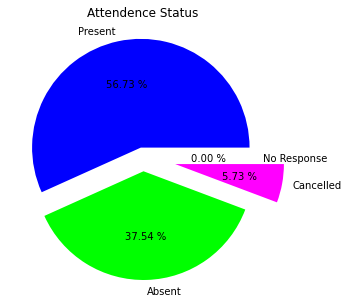

In [80]:
Present = BU.loc[BU['Attendance'] == 'Present'].count()[0]
Absent = BU.loc[BU['Attendance'] == 'Absent'].count()[0]
Cancelled=BU.loc[BU['Attendance'] == 'Cancelled'].count()[0]
No_response=BU.loc[BU['Attendance'] == 'No Response'].count()[0]

plt.figure(figsize=(8,5))

labels = ['Present', 'Absent','Cancelled','No Response']
colors = [(0,0,1), (0,1,0),(1,0,1),(1,1,0)]
explode = (.1,.12,.3,0)
plt.pie([Present,Absent,Cancelled,No_response],explode=explode, labels = labels, colors=colors, autopct='%.2f %%')

plt.title('Attendence Status')

plt.show()

In [45]:
TR.tail()

,Trainer Name,Date,Timing,Grade,Batch size,Batch count,Batch,Topics
169,FAC_5009,27 April Monday,6.00 pm - 6.45 pm,"Grade 3,4",NaN,NaN,Trial IV,Emotional energy
170,FAC_5040,27 April Monday,6.00 pm - 6.45 pm,"Grade 1,2",NaN,NaN,Trial IV,In my mind's eye
171,FAC_5038,27 April Monday,6.00 pm - 6.45 pm,"Grade 3,4",NaN,NaN,Trial II,Play with Punctuation
172,FAC_5002,27 April Monday,6.00 pm - 6.45 pm,"Grade 1,2",NaN,NaN,Trial II,Word Whiz
173,FAC_5022,27 April Monday,6.00 pm - 6.45 pm,"Grade 1,2",NaN,NaN,Trial III,Rocking with rhymes


In [56]:
TR.dtypes

Trainer Name     object
Date             object
Timing           object
Grade            object
Batch size       object
Batch count     float64
Batch            object
Topics           object
Start Time       object
End Time         object
dtype: object

In [111]:
TR.isnull().sum()

Trainer Name     1
Date             0
Timing           0
Grade            0
Batch size      14
Batch count     15
Batch            0
Topics           0
Start Time       0
End Time         0
dtype: int64

In [112]:
TR['Trainer Name'].fillna('NO Response', inplace = True)

In [51]:
tr=TR.Timing.str.split('-',expand=True)


## Allocation of batches to the trainers

In [123]:
Tot_Cases=TR.groupby('Trainer Name')['Batch'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

,Batch
Trainer Name,
FAC_5014,trial Itrial Itrial I
FAC_5024,trial Itrial IItrial ITrial I
FAC_5012,trial Itrial IItrial II
FAC_5002,trial Itrial IIItrial IItrial IIItrial Itrial IItrial IItrial ITrial ITrial IVTrial IIITrial II
FAC_5009,trial Itrial IIItrial IIItrial IIItrial IIItrial ITrial IIITrial IITrial ITrial ITrial ITrial IIITrial IITrial IV
FAC_5019,trial Itrial IIItrial IIITrial I
FAC_5016,trial Itrial IIITrial I
FAC_5021,trial Itrial I
FAC_5020,trial ITrial IVTrial III


Allocation of the trainers in different batches.

<Figure size 432x288 with 0 Axes>

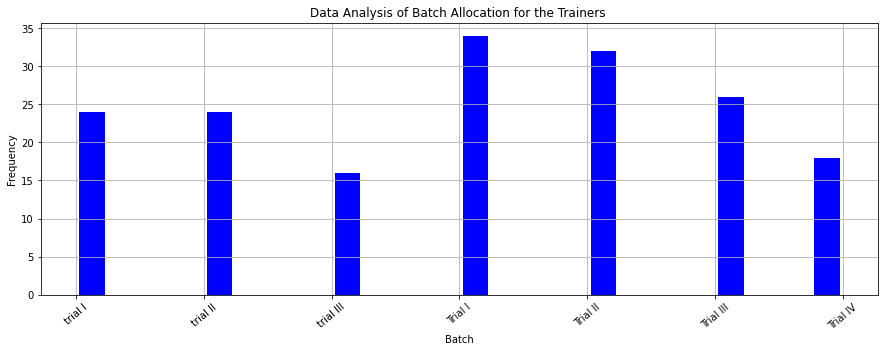

In [128]:
fig = plt.figure();
fig= plt.figure(figsize=(15,5))
plt.hist(TR["Batch"],bins=24,  rwidth=.8, color=(0,0,1),)
plt.title('Data Analysis of Batch Allocation for the Trainers ')
plt.xlabel("Batch")
plt.ylabel("Frequency")
plt.xticks(rotation=40)
plt.grid()


Total 35 trainers are allocated to batch-1 rest as followed

In [52]:
tr.tail()

,0,1
169,6.00 pm,6.45 pm
170,6.00 pm,6.45 pm
171,6.00 pm,6.45 pm
172,6.00 pm,6.45 pm
173,6.00 pm,6.45 pm


In [54]:
TR['Start Time']=tr[0]
TR['End Time']=tr[1]

In [55]:
TR.tail()

,Trainer Name,Date,Timing,Grade,Batch size,Batch count,Batch,Topics,Start Time,End Time
169,FAC_5009,27 April Monday,6.00 pm - 6.45 pm,"Grade 3,4",NaN,NaN,Trial IV,Emotional energy,6.00 pm,6.45 pm
170,FAC_5040,27 April Monday,6.00 pm - 6.45 pm,"Grade 1,2",NaN,NaN,Trial IV,In my mind's eye,6.00 pm,6.45 pm
171,FAC_5038,27 April Monday,6.00 pm - 6.45 pm,"Grade 3,4",NaN,NaN,Trial II,Play with Punctuation,6.00 pm,6.45 pm
172,FAC_5002,27 April Monday,6.00 pm - 6.45 pm,"Grade 1,2",NaN,NaN,Trial II,Word Whiz,6.00 pm,6.45 pm
173,FAC_5022,27 April Monday,6.00 pm - 6.45 pm,"Grade 1,2",NaN,NaN,Trial III,Rocking with rhymes,6.00 pm,6.45 pm


## Rgression graph for total class duration for the trainers

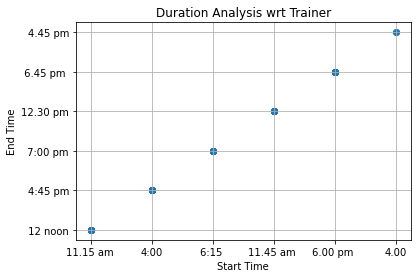

In [67]:
plt.scatter(TR['Start Time'],TR['End Time'])
plt.xlabel("Start Time")
plt.ylabel("End Time")
plt.title('Duration Analysis wrt Trainer')
plt.grid()

## Allocation of Topics to the Trainers

In [154]:
Tot_Case=TR.groupby('Trainer Name')['Topics'].sum().sort_values(ascending=False).to_frame()
Tot_Case.style.background_gradient(cmap='Reds')

,Topics
Trainer Name,
FAC_5009,word whizName it Structure of a storySum it upRocking with rhymesSum it upCategory SpinIn my head or real?Word WhizEmotional Energy Structure of a storyIn my head or real?Elements of a storyEmotional energy
FAC_5008,storm in my brainSum it upSum it upMaking connectionsCategory SpinCategory SpinMaking ConnectionsIn my head or real?In my mind's eye
FAC_5039,Word WhizWord WhizWord WhizIn my mind's eyeWord WhizCategory SpinSpelling starRocking with RhymesCategory Spin
FAC_5017,Word WhizWord WhizWord Whiz
FAC_5037,Word WhizStructure of a story
FAC_5040,Word WhizStorm in my brainStorm in my brainRocking with rhymesRocking with rhymesRocking with RhymesStorm in my brainIn my mind's eye
FAC_5051,Word WhizRocking with Rhymes
FAC_5024,Word WhizPlay with PunctuationsWord WhizStructure of a story
FAC_5027,Word WhizName itName it Word Whiz


topics allocated to the Trainers

In [46]:
SB.tail()

,Child Name,Registered Number,Registered Email ID,Payment date,Sale by,Grade,Pricing,Duration,Sessions preferred,Live session details
413,CH_32081,9.111002e+11,s2m_test_22161@tests2m.com,2020-04-27 00:00:00,SP_1005,2,1999,12G + 1yr,Assigned,NaN
414,CH_32082,9.111002e+11,s2m_test_22162@tests2m.com,2020-04-27 00:00:00,SP_1012,3,1999,10G +1 yr,Assigned,NaN
415,CH_31831,9.111002e+11,s2m_test_21876@tests2m.com,2020-04-27 00:00:00,SP_1005,3,1999,14G + 1yr,Assigned,NaN
416,CH_32079,9.111002e+11,s2m_test_22158@tests2m.com,2020-04-27 00:00:00,SP_1005,2,1999,12G + 1yr,NaN,NaN
417,CH_32083,9.111002e+11,s2m_test_21404@tests2m.com,2020-04-27 00:00:00,SP_1012,4,1999,10G + 1Yr,Morning,NaN
